In [ ]:
!pip install tensorflow

!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

import os
import pandas as pd

test_images_path = '/content/drive/MyDrive/test_images'
test_dir = os.listdir(test_images_path)
print('test images: ',test_dir[:10])

train_imges_path = '/content/drive/MyDrive/train_images'
train_dir = os.listdir(train_imges_path)
print('train images: ',train_dir[:10])

test images:  ['202925.jpg', '202931.jpg', '203385.jpg', '201586.jpg', '203391.jpg', '200698.jpg', '200868.jpg', '200840.jpg', '202919.jpg', '203018.jpg']
train images:  ['.DS_Store', 'tungro', 'bacterial_leaf_streak', 'normal', 'blast', 'downy_mildew', 'bacterial_panicle_blight', 'brown_spot', 'hispa', 'dead_heart']


In [ ]:
import datetime, os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.metrics import Accuracy


In [ ]:
SEED = 548
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 112

img_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

In [ ]:
train_ds = img_gen.flow_from_directory('/content/drive/MyDrive/train_images',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=True,
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="training")

classes = list(train_ds.class_indices.keys())

print('Classes: '+str(classes))

num_classes  = len(classes)

Found 9377 images belonging to 10 classes.
Classes: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [ ]:
val_ds = img_gen.flow_from_directory('/content/drive/MyDrive/train_images',
                                       target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                       shuffle=False,
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       subset="validation")

Found 1036 images belonging to 10 classes.


In [ ]:
test_ds = img_gen.flow_from_directory('/content/drive/MyDrive/test_images',
                                      target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                      classes=['.'],
                                      class_mode= None,
                                      batch_size=BATCH_SIZE)

Found 3479 images belonging to 1 classes.


In [ ]:
nb_train_samples = train_ds.samples

steps_per_epoch = nb_train_samples // BATCH_SIZE

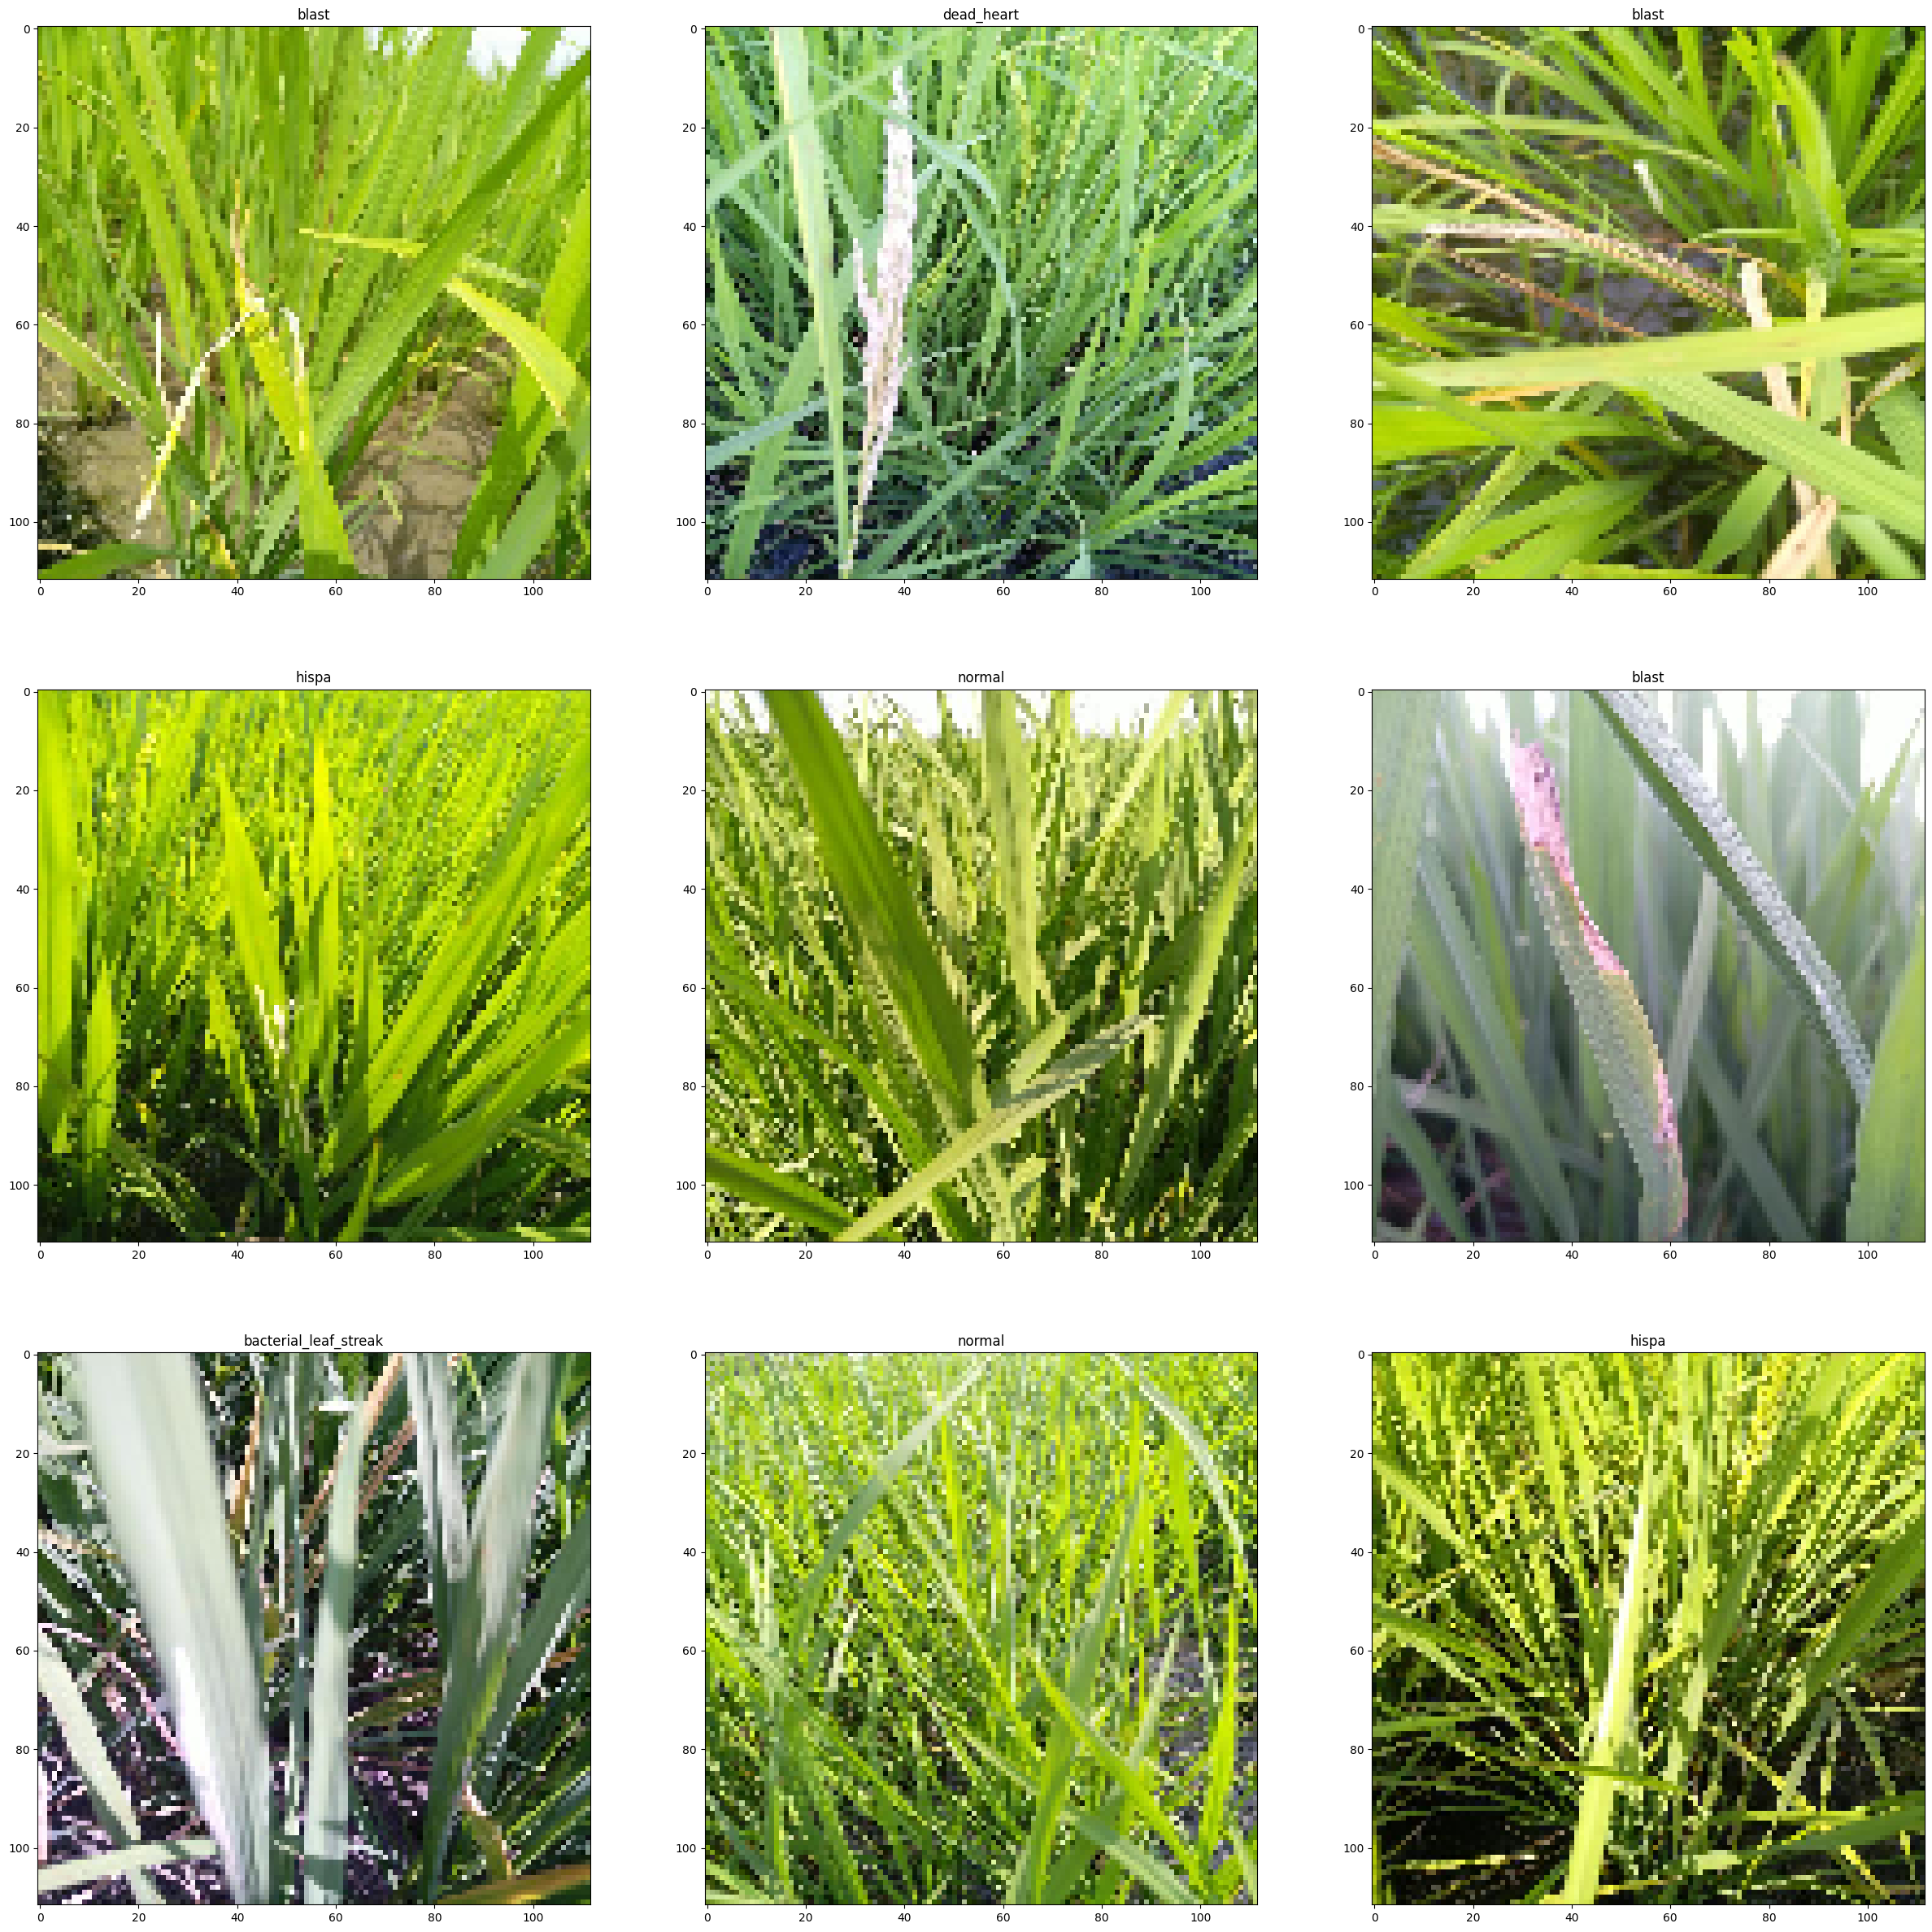

In [ ]:
plt.figure(figsize=(30,30))
images = train_ds.next()*255
for i, (image, l) in enumerate(zip(images[0][:9],images[1][:9])):
    ax = plt.subplot(330 + 1 + i)
    ax.set_title( classes[np.argmax(l)] )
    plt.imshow(image)
plt.show()

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8192, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch = steps_per_epoch,
    epochs = 15,
    validation_data = val_ds
)

Epoch 1/15
146/146 [==============================] - 2253s 15s/step - loss: 2.0172 - accuracy: 0.2586 - val_loss: 1.7887 - val_accuracy: 0.3764
Epoch 2/15
146/146 [==============================] - 227s 2s/step - loss: 1.6899 - accuracy: 0.4055 - val_loss: 1.5279 - val_accuracy: 0.4749
Epoch 3/15
146/146 [==============================] - 220s 2s/step - loss: 1.4551 - accuracy: 0.4978 - val_loss: 1.3135 - val_accuracy: 0.5405
Epoch 4/15
146/146 [==============================] - 213s 1s/step - loss: 1.2152 - accuracy: 0.5901 - val_loss: 1.2694 - val_accuracy: 0.5502
Epoch 5/15
146/146 [==============================] - 223s 2s/step - loss: 1.0025 - accuracy: 0.6676 - val_loss: 1.0276 - val_accuracy: 0.6554
Epoch 6/15
146/146 [==============================] - 218s 1s/step - loss: 0.8370 - accuracy: 0.7234 - val_loss: 0.9169 - val_accuracy: 0.6998
Epoch 7/15
146/146 [==============================] - 210s 1s/step - loss: 0.6600 - accuracy: 0.7891 - val_loss: 0.7586 - val_accuracy: 0.76

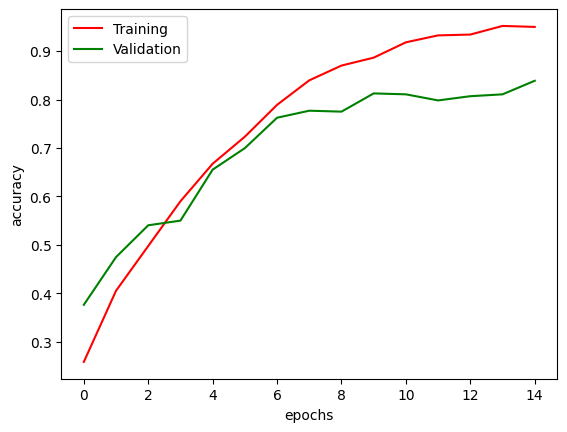

In [ ]:
plt.plot(history.history["accuracy"], color="r")
plt.plot(history.history["val_accuracy"], color="g")
plt.legend(["Training", "Validation"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [ ]:
predict = model.predict(test_ds, verbose=1)

55/55 [==============================] - 795s 15s/step


In [ ]:
predicted_class_indices = np.argmax(predict,axis=1)
print(set(predicted_class_indices))

inv_map = {v:k for k,v in train_ds.class_indices.items()}

predictions = [inv_map[k] for k in predicted_class_indices]

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
filenames = test_ds.filenames

submission = pd.DataFrame({ "image_id":filenames, "label":predictions })

submission.image_id = submission.image_id.str.replace('./', '')
submission.to_csv("submission.csv",index=False)
submission.head()

<ipython-input-27-e46d31cc7453>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  submission.image_id = submission.image_id.str.replace('./', '')


,image_id,label
0,200001.jpg,downy_mildew
1,200002.jpg,hispa
2,200003.jpg,dead_heart
3,200004.jpg,hispa
4,200005.jpg,normal
